N = 10000
Mean = 14.436, Median = 3.381
Mass at 3.0 = 44.44%
Mass at 1000.0 = 0.28%


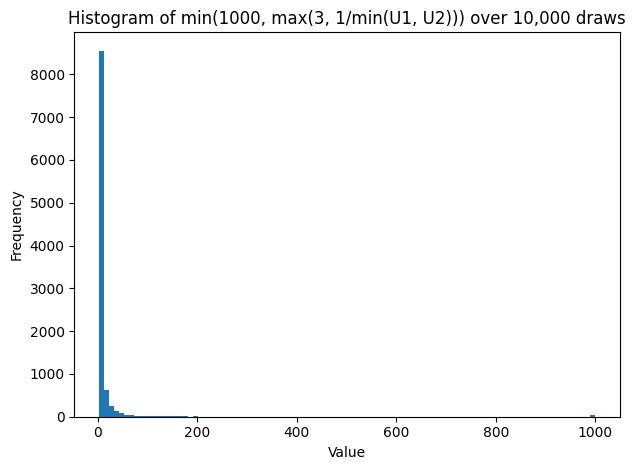

In [2]:
from random import random
f = min(
    1000, # makes sure its less than 1000
    max( # makes sure its more than 3 
        3,
        1/min(   # 1 / min (two uniforms)
            random(),
            random()
        )
    )
)

# Simulation: run the user's expression 10,000 times and plot a frequency histogram

import random
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility (remove or change the seed if you want fresh randomness)
random.seed(42)

def draw_once():
    # Two independent U(0,1) draws
    u1 = random.random()
    u2 = random.random()
    m = min(u1, u2)
    # Guard against a theoretical zero (extremely rare but let's be safe)
    if m == 0.0:
        m = 1e-12
    val = 1.0 / m
    # min(1000, max(3, val))
    if val < 3:
        val = 3.0
    if val > 1000:
        val = 1000.0
    return val

# Run the experiment 10,000 times
N = 10_000
samples = [draw_once() for _ in range(N)]
samples = np.array(samples)

# Quick summary stats (useful to understand the heavy tail and clamping)
mean_val = float(np.mean(samples))
median_val = float(np.median(samples))
pct_at_3 = float(np.mean(samples == 3.0)) * 100.0
pct_at_1000 = float(np.mean(samples == 1000.0)) * 100.0

print(f"N = {N}")
print(f"Mean = {mean_val:.3f}, Median = {median_val:.3f}")
print(f"Mass at 3.0 = {pct_at_3:.2f}%")
print(f"Mass at 1000.0 = {pct_at_1000:.2f}%")

# Plot histogram (linear scale — we can switch to log-y if you'd like)
bins = np.linspace(3, 1000, 101)  # 100 equal-width bins covering [3, 1000]
plt.figure()
plt.hist(samples, bins=bins)
plt.title("Histogram of min(1000, max(3, 1/min(U1, U2))) over 10,000 draws")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.tight_layout()
# plt.savefig("/mnt/data/histogram.png", dpi=150)
plt.show()


In [1]:
def f(n, m):
    if n < m:
        return 1
    return f(n - 1, m) + f(n - m, m)

f(40, 4)

217286